In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

Задание 1

In [167]:
data = pd.read_csv(r"C:\Users\mkuzo\Desktop\Программирование_2 сем\mag2022\CL\term02\03-LinearClassification\Diabetes Binary Classification.csv")
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [168]:
data.size

6912

In [169]:
data.shape

(768, 9)

In [170]:
data.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class variable (0 or 1)                                                       int64
dtype: object

In [171]:
data.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

Посмотрела все колонки, оставляем все, кроме Triceps skin fold thickness (mm) (Толщина кожной складки трицепса (мм)), непонятно, как это может влиять на наличие или отсутсвие диабета. 

In [173]:
data.drop(columns = 'Triceps skin fold thickness (mm)', axis = 1, inplace = True)

Посмотрим баланс

In [174]:
data['Class variable (0 or 1)'].value_counts()

0    500
1    268
Name: Class variable (0 or 1), dtype: int64

Бодеющих (1) мало (это хорошо), баланс выборки не очень (это не очень хорошо, но лучше пусть не болеют)

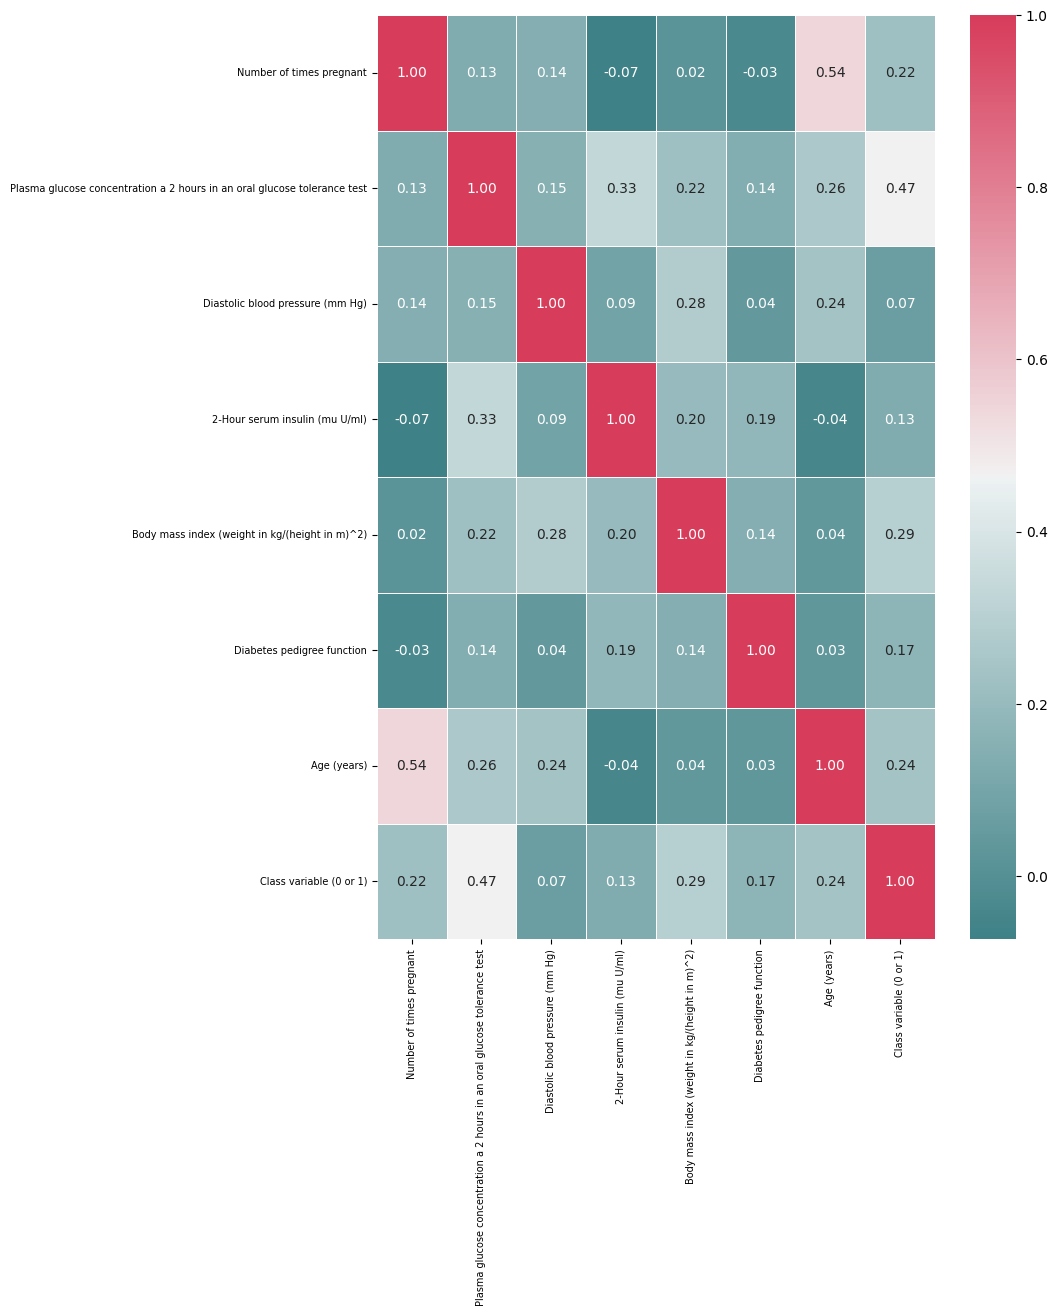

In [175]:
data_1 = pd.DataFrame(data=np.c_[data.drop(columns = 'Class variable (0 or 1)', axis = 1), data['Class variable (0 or 1)']],
                     columns=list(data.drop(columns = 'Class variable (0 or 1)', axis = 1)) + ['Class variable (0 or 1)'])

plt.figure(figsize=(9,12))

corr = data_1.corr()

g = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(200, 5,as_cmap=True))

g.set_xticklabels(g.get_xticklabels(), fontsize = 7)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 7)
plt.show()

In [176]:
X = data.drop('Class variable (0 or 1)', axis=1)
y = data['Class variable (0 or 1)']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [177]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [178]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       458
           1       0.49      0.80      0.61       118

    accuracy                           0.79       576
   macro avg       0.71      0.79      0.73       576
weighted avg       0.85      0.79      0.80       576
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       146
           1       0.45      0.74      0.56        46

    accuracy                           0.72       192
   macro avg       0.67      0.73      0.68       192
weighted avg       0.79      0.72      0.74       192



In [179]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       449
           1       0.53      0.80      0.63       127

    accuracy                           0.80       576
   macro avg       0.73      0.80      0.75       576
weighted avg       0.84      0.80      0.81       576
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       142
           1       0.49      0.74      0.59        50

    accuracy                           0.73       192
   macro avg       0.69      0.73      0.69       192
weighted avg       0.78      0.73      0.74       192



In [180]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression())])

In [181]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       451
           1       0.51      0.78      0.61       125

    accuracy                           0.79       576
   macro avg       0.72      0.78      0.73       576
weighted avg       0.84      0.79      0.80       576
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       142
           1       0.49      0.74      0.59        50

    accuracy                           0.73       192
   macro avg       0.69      0.73      0.69       192
weighted avg       0.78      0.73      0.74       192



In [182]:
cm = confusion_matrix(ypred_test, y_test)
cm


array([[103,  39],
       [ 13,  37]], dtype=int64)

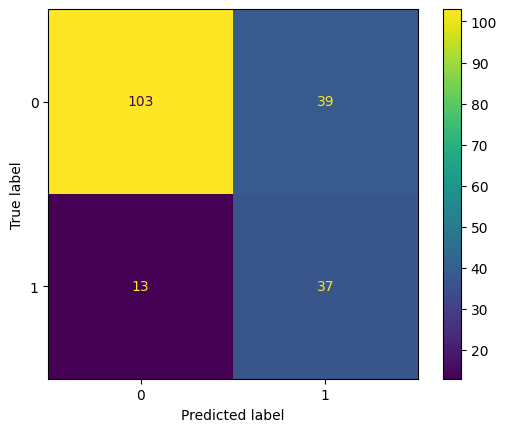

In [183]:
ConfusionMatrixDisplay(cm).plot()

Задание 2

In [184]:
data = pd.read_csv(r"C:\Users\mkuzo\Desktop\Программирование_2 сем\mag2022\CL\term02\03-LinearClassification\bike_buyers_clean.csv")
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [185]:
data.size

13000

In [186]:
data.shape

(1000, 13)

In [187]:
data.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [188]:
data.dtypes.value_counts()

object    8
int64     5
dtype: int64

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


Сразу удаляем ID

In [190]:
data.drop(columns = 'ID', axis = 1, inplace = True)

In [191]:
for c in data.columns:
    print(c)
    print(data[c].unique())

Marital Status
['Married' 'Single']
Gender
['Female' 'Male']
Income
[ 40000  30000  80000  70000  10000 160000  20000  90000 170000  60000
 100000 130000 120000 150000  50000 110000]
Children
[1 3 5 0 2 4]
Education
['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation
['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner
['Yes' 'No']
Cars
[0 1 2 4 3]
Commute Distance
['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']
Region
['Europe' 'Pacific' 'North America']
Age
[42 43 60 41 36 50 33 58 48 54 55 35 45 38 59 47 56 34 63 29 40 44 32 26
 31 62 30 28 65 66 46 52 39 61 37 68 51 49 53 27 25 67 57 70 78 69 64 89
 80 73 74 71 72]
Purchased Bike
['No' 'Yes']


Поработаем с данными. Супружеский статус, пол, владение недвижимостью и покупку велосипеда переписываем как 0 и 1

In [192]:
data['Marital Status'] = data['Marital Status'].apply(lambda x : 0 if x == 'Single' else 1)

In [193]:
data['Gender'] = data['Gender'].apply(lambda x : 0 if x == 'Male' else 1)

In [194]:
data['Home Owner'] = data['Home Owner'].apply(lambda x : 0 if x == 'No' else 1)

In [195]:
data['Purchased Bike'] = data['Purchased Bike'].apply(lambda x : 0 if x == 'No' else 1)

Посмотрим на образование и занятость (работу)

In [196]:
data['Education'].value_counts()

Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: Education, dtype: int64

In [197]:
data['Occupation'].value_counts()

Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: Occupation, dtype: int64

Вроде нормальный баланс, особенно по типу занятости, можно разбить колонки

In [198]:
data = pd.get_dummies(data, columns=['Education'], drop_first = True)

In [199]:
data = pd.get_dummies(data, columns=['Occupation'], drop_first = True)

Расстояние до места работы: посмотрим сколько вариантов

In [200]:
data['Commute Distance'].value_counts()

0-1 Miles     366
5-10 Miles    192
1-2 Miles     169
2-5 Miles     162
10+ Miles     111
Name: Commute Distance, dtype: int64

Можно переписать через присваивание числовых значений

In [201]:
def map_Commute_Distance(Commute_Distance):
    repl = dict(zip(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'], range(5)))
    return repl[Commute_Distance]

data['Commute Distance'] = data['Commute Distance'].apply(map_Commute_Distance)

Регион

In [202]:
data['Region'].value_counts() 

North America    508
Europe           300
Pacific          192
Name: Region, dtype: int64

In [203]:
data = pd.get_dummies(data, columns=['Region'], drop_first = True)

Как теперь выглядит датасет после всех действий: 

In [204]:
data.head()

,Marital Status,Gender,Income,Children,Home Owner,Cars,Commute Distance,Age,Purchased Bike,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Region_North America,Region_Pacific
0,1,1,40000,1,1,0,0,42,0,0,0,0,0,0,0,0,1,0,0
1,1,0,30000,3,1,1,0,43,0,0,0,1,0,0,0,0,0,0,0
2,1,0,80000,5,0,2,2,60,0,0,0,1,0,0,0,1,0,0,0
3,0,0,70000,0,1,1,3,41,1,0,0,0,0,0,0,1,0,0,1
4,0,0,30000,0,0,0,0,36,1,0,0,0,0,0,0,0,0,0,0


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Marital Status                 1000 non-null   int64
 1   Gender                         1000 non-null   int64
 2   Income                         1000 non-null   int64
 3   Children                       1000 non-null   int64
 4   Home Owner                     1000 non-null   int64
 5   Cars                           1000 non-null   int64
 6   Commute Distance               1000 non-null   int64
 7   Age                            1000 non-null   int64
 8   Purchased Bike                 1000 non-null   int64
 9   Education_Graduate Degree      1000 non-null   uint8
 10  Education_High School          1000 non-null   uint8
 11  Education_Partial College      1000 non-null   uint8
 12  Education_Partial High School  1000 non-null   uint8
 13  Occupation_Manageme

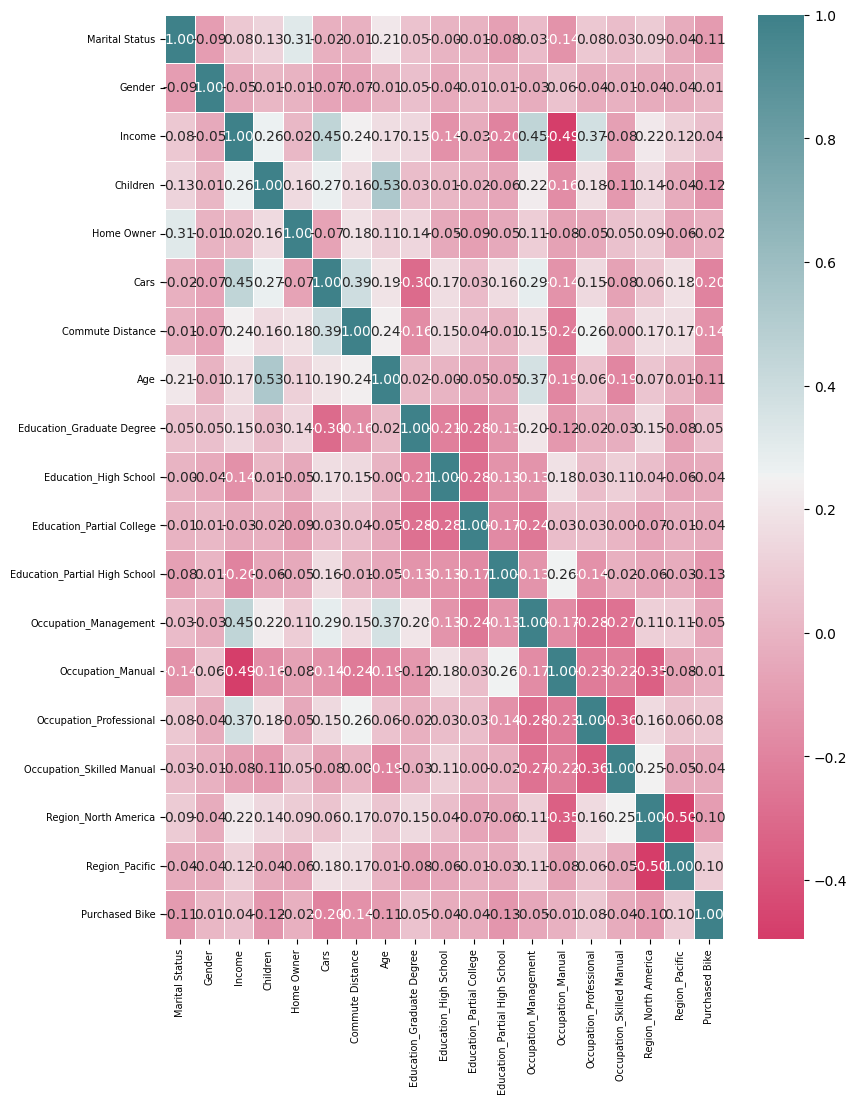

In [206]:
data_1 = pd.DataFrame(data=np.c_[data.drop(columns = 'Purchased Bike', axis = 1), data['Purchased Bike']],
                     columns=list(data.drop(columns = 'Purchased Bike', axis = 1)) + ['Purchased Bike'])

plt.figure(figsize=(9,12))

corr = data_1.corr()

g = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(360, 205,as_cmap=True))

g.set_xticklabels(g.get_xticklabels(), fontsize = 7)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 7)
plt.show()

:О
:((

In [207]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [208]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [209]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       377
           1       0.65      0.65      0.65       373

    accuracy                           0.65       750
   macro avg       0.65      0.65      0.65       750
weighted avg       0.65      0.65      0.65       750
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       135
           1       0.62      0.57      0.59       115

    accuracy                           0.64       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.64      0.64      0.64       250



In [210]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       397
           1       0.62      0.66      0.64       353

    accuracy                           0.65       750
   macro avg       0.65      0.65      0.65       750
weighted avg       0.65      0.65      0.65       750
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       137
           1       0.57      0.54      0.55       113

    accuracy                           0.61       250
   macro avg       0.60      0.60      0.60       250
weighted avg       0.61      0.61      0.61       250



In [211]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(class_weight='balanced'))])

In [212]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64       368
           1       0.66      0.64      0.65       382

    accuracy                           0.65       750
   macro avg       0.65      0.65      0.65       750
weighted avg       0.65      0.65      0.65       750
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       135
           1       0.62      0.57      0.59       115

    accuracy                           0.64       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.64      0.64      0.64       250



In [213]:
cm = confusion_matrix(ypred_test, y_test)
cm

array([[94, 41],
       [49, 66]], dtype=int64)

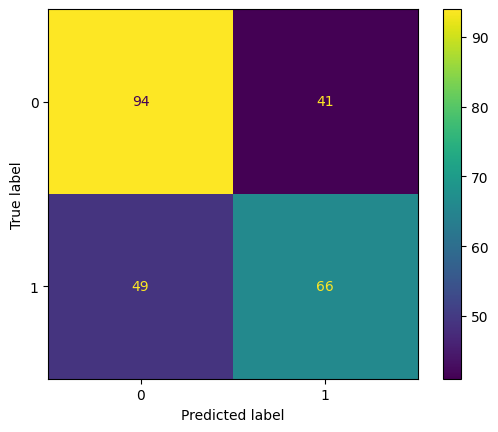

In [214]:
ConfusionMatrixDisplay(cm).plot()

плохо... попробую удалить что-нибудь 

In [215]:
data.head()

,Marital Status,Gender,Income,Children,Home Owner,Cars,Commute Distance,Age,Purchased Bike,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Region_North America,Region_Pacific
0,1,1,40000,1,1,0,0,42,0,0,0,0,0,0,0,0,1,0,0
1,1,0,30000,3,1,1,0,43,0,0,0,1,0,0,0,0,0,0,0
2,1,0,80000,5,0,2,2,60,0,0,0,1,0,0,0,1,0,0,0
3,0,0,70000,0,1,1,3,41,1,0,0,0,0,0,0,1,0,0,1
4,0,0,30000,0,0,0,0,36,1,0,0,0,0,0,0,0,0,0,0


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Marital Status                 1000 non-null   int64
 1   Gender                         1000 non-null   int64
 2   Income                         1000 non-null   int64
 3   Children                       1000 non-null   int64
 4   Home Owner                     1000 non-null   int64
 5   Cars                           1000 non-null   int64
 6   Commute Distance               1000 non-null   int64
 7   Age                            1000 non-null   int64
 8   Purchased Bike                 1000 non-null   int64
 9   Education_Graduate Degree      1000 non-null   uint8
 10  Education_High School          1000 non-null   uint8
 11  Education_Partial College      1000 non-null   uint8
 12  Education_Partial High School  1000 non-null   uint8
 13  Occupation_Manageme

In [217]:
data.drop(columns = ['Home Owner', 'Income', 'Gender'], axis = 1, inplace = True)

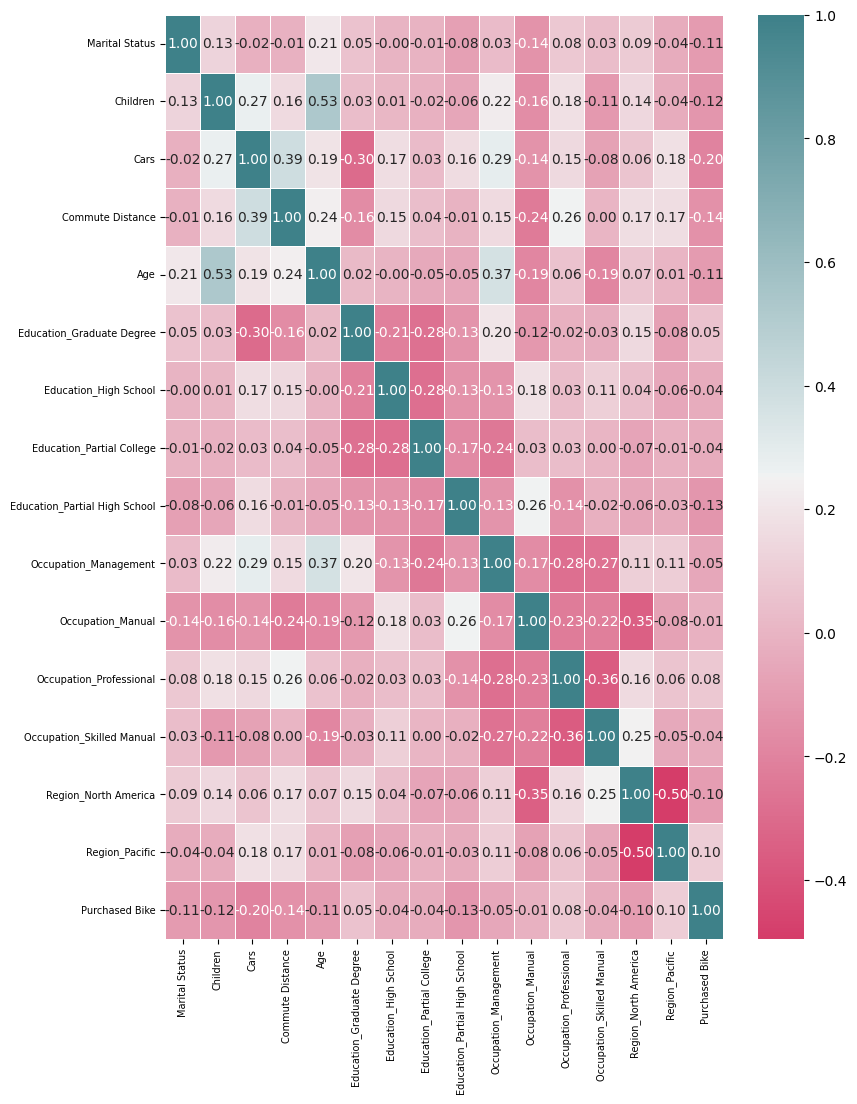

In [218]:
data_1 = pd.DataFrame(data=np.c_[data.drop(columns = 'Purchased Bike', axis = 1), data['Purchased Bike']],
                     columns=list(data.drop(columns = 'Purchased Bike', axis = 1)) + ['Purchased Bike'])

plt.figure(figsize=(9,12))

corr = data_1.corr()

g = sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(360, 205,as_cmap=True))

g.set_xticklabels(g.get_xticklabels(), fontsize = 7)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 7)
plt.show()

In [219]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [220]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       427
           1       0.59      0.65      0.61       323

    accuracy                           0.65       750
   macro avg       0.65      0.65      0.65       750
weighted avg       0.66      0.65      0.65       750
               precision    recall  f1-score   support

           0       0.71      0.61      0.65       146
           1       0.54      0.64      0.59       104

    accuracy                           0.62       250
   macro avg       0.62      0.63      0.62       250
weighted avg       0.64      0.62      0.63       250



In [222]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       454
           1       0.53      0.64      0.58       296

    accuracy                           0.63       750
   macro avg       0.63      0.63      0.63       750
weighted avg       0.65      0.63      0.64       750
               precision    recall  f1-score   support

           0       0.69      0.59      0.64       147
           1       0.52      0.62      0.56       103

    accuracy                           0.60       250
   macro avg       0.60      0.61      0.60       250
weighted avg       0.62      0.60      0.61       250



In [223]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(class_weight='balanced'))])

In [224]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       386
           1       0.64      0.63      0.64       364

    accuracy                           0.65       750
   macro avg       0.65      0.65      0.65       750
weighted avg       0.65      0.65      0.65       750
               precision    recall  f1-score   support

           0       0.65      0.60      0.63       136
           1       0.56      0.61      0.59       114

    accuracy                           0.61       250
   macro avg       0.61      0.61      0.61       250
weighted avg       0.61      0.61      0.61       250



In [225]:
cm = confusion_matrix(ypred_test, y_test)
cm

array([[82, 54],
       [44, 70]], dtype=int64)

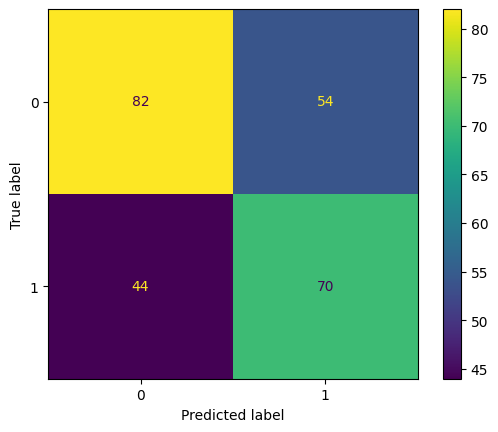

In [226]:
ConfusionMatrixDisplay(cm).plot()

Стало на полпроцента лучше